- data/historcial futures/ 폴더에 csv형식의 과거 선물 데이터가 있음
- 이베스트에서 거래가능한 종목만 선별하여 DB 파일로 만듬
- Model.Product 에서 historical_ohlc() 함수로 로드

In [1]:
import sys
sys.path.append('..')
sys.path.append('../scripts')

In [2]:
import pickle
import glob
import h5py
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models import OHLC, Products, Product, ConnectDate
from tools import ohlc_chart, view

In [3]:
""" DB 로드"""
products = pickle.load(open('../data/products.pkl', 'rb')) #종목정보
db = h5py.File('../data/historical_ohlc_old.h5py', 'r')

In [6]:
df = pd.DataFrame(db['ZC'][:])

In [8]:
df.columns = ['date','open','high','low','close']

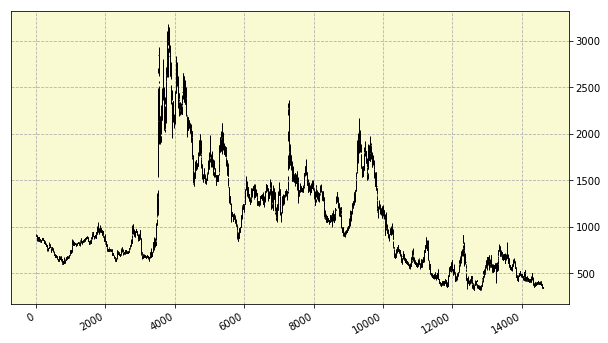

In [10]:
view(df, period='day')

In [25]:
file = glob.glob(f'../data/historical futures/HG_*')[0]

In [26]:
file

'../data/historical futures\\HG_Copper.csv'

In [27]:
df = pd.read_csv(file,
                         skiprows=[0],
                         names=['date','open','high','low','close','volume','openint'],
                         parse_dates=['date'])

In [37]:
def save_historical(symbol):
    arr = glob.glob(f'../data/historical futures/{symbol}_*')
    if arr:
        file = arr[0]
        df = pd.read_csv(file,
                         skiprows=[0],
                         names=['date','open','high','low','close','volume','openint'],
                         parse_dates=['date'])
        # 엔화/구리/은 선물가격이 이베스트 증권 제공 가격과 단위차이가 있어서 보정
        if symbol == 'JY':
            df[['open','high','low','close']] = df[['open','high','low','close']]*10000
        
        elif symbol == 'HG':
            df[['open','high','low','close']] = df[['open','high','low','close']]/100
        
        elif symbol == 'SI':
            df[['open','high','low','close']] = df[['open','high','low','close']]/100
        
        df = df.round(products[symbol].decimal_len)
        #df.columns = ['date','open','high','low','close','oi','volume']
        #df.set_index('date', inplace=True)
        df['date'] = df['date'].astype('int64')
        db.create_dataset(symbol, data=df.values)
        print(f'{symbol} saved')

In [38]:
for p in products.keys():
    save_historical(p)

AD saved
BP saved
BR saved
CC saved
CD saved
CL saved
CT saved
DX saved
ED saved
EMD saved
ES saved
FBTP saved
FC saved
FDAX saved
FESX saved
FGBL saved
FGBM saved
FGBS saved
FOAM saved
FOAT saved
FVS saved
GC saved
HG saved
HO saved
JY saved
KC saved
LC saved
LH saved
NE saved
NG saved
NIY saved
NKD saved
NQ saved
OJ saved
PA saved
PL saved
RB saved
RTY saved
RY saved
SB saved
SF saved
SI saved
URO saved
VX saved
YM saved
ZB saved
ZC saved
ZF saved
ZL saved
ZM saved
ZN saved
ZO saved
ZR saved
ZS saved
ZT saved
ZW saved


In [39]:
db.close()

In [40]:
db = h5py.File('../data/historical_ohlc.h5py', 'r')

In [41]:
def historical_ohlc(symbol):
    db = h5py.File('../data/historical_ohlc.h5py', 'r')
    if symbol in db.keys():
        data = db[symbol][:]
        df = pd.DataFrame(data[:,[1,2,3,4,5,6]], index=data[:,0].astype('M8[ns]'), columns=['open','high','low','close','volume','openint'])
        db.close()
        return df
    else:
        print(f"There is no historical data for {symbol}")

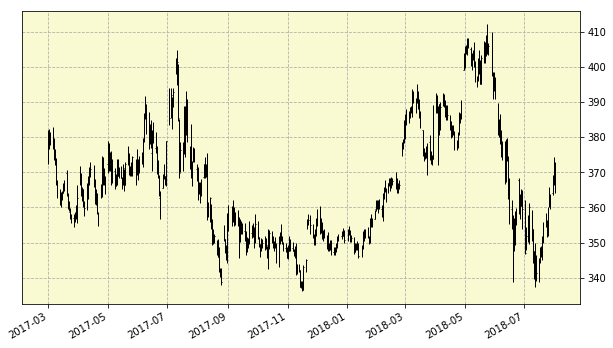

In [58]:
view(historical_ohlc('ZC')['2017-03-01':'2018-08-01'], period='day', colors=['k','k'])

In [55]:
historical_ohlc('ZC')['2015-07-01':]

,open,high,low,close,volume,openint
2015-07-01,421.25,426.38,411.88,423.62,667830.0,1306308.0
2015-07-02,421.75,430.62,418.62,428.50,450564.0,1306308.0
2015-07-06,425.88,427.88,416.88,427.00,367892.0,1313876.0
2015-07-07,420.63,424.12,415.38,423.62,564168.0,1323094.0
2015-07-08,422.88,428.88,418.62,424.00,364955.0,1307860.0
2015-07-09,424.25,432.88,424.25,427.62,438065.0,1318931.0
2015-07-10,428.00,439.00,425.12,434.38,475764.0,1326236.0
2015-07-13,434.88,441.88,431.13,440.88,364013.0,1346001.0
2015-07-14,440.00,443.12,427.38,427.88,443126.0,1348574.0
2015-07-15,426.88,431.62,421.62,430.12,456242.0,1358032.0
